# Mean Shift Î™®Îç∏, ÏûÖÎ†• Îç∞Ïù¥ÌÑ∞Îäî outline data

## import libraries

In [1]:
import requests
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

## Azure keys(ÏÇ¨Ïö©Ïûê ÏûÖÎ†•)

## Custom vision Í≤∞Í≥º ÌôïÏù∏ Î∞è ÌÅ¨Î°≠

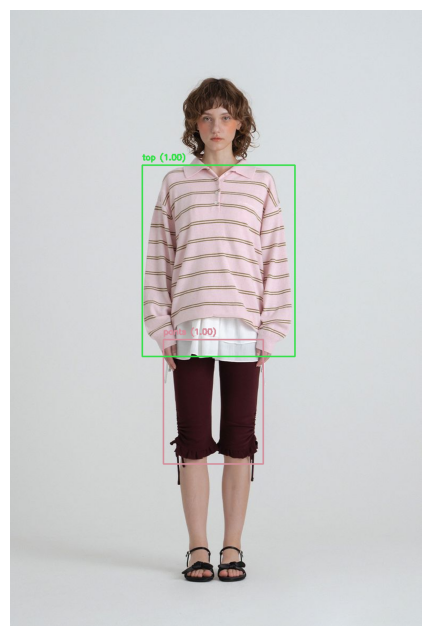

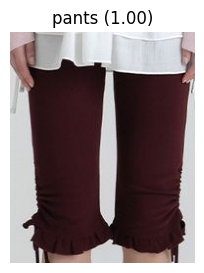

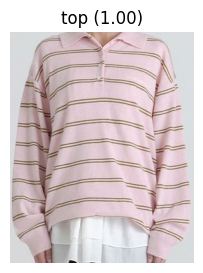

Tag: pants, Probability: 1.00, Image Shape: (236, 189, 3)
Tag: top, Probability: 1.00, Image Shape: (363, 289, 3)


In [3]:
## Custom Vision Í≤∞Í≥º ÌôïÏù∏
# ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
THRESHOLD = 0.8  # 80% Ïù¥ÏÉÅ ÌôïÎ•†Îßå ÌëúÏãú

#Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
image_file = f"data/musinsa_images_pants_ver2/pants_313.jpg"

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
category_colors = defaultdict(lambda: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

def detect_objects(image_path):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    # API ÏöîÏ≤≠ Ìó§Îçî Î∞è Îç∞Ïù¥ÌÑ∞
    headers = {
        "Prediction-Key": prediction_key,
        "Content-Type": "application/octet-stream"
    }
    url = f"{prediction_endpoint}/customvision/v3.0/Prediction/{project_id}/detect/iterations/{model_name}/image"
    
    # ÏöîÏ≤≠ Ï†ÑÏÜ°
    response = requests.post(url, headers=headers, data=image_data)
    
    if response.status_code != 200:
        print("Error:", response.text)
        return None

    # JSON ÏùëÎãµ Îç∞Ïù¥ÌÑ∞ ÌååÏã±
    return response.json()

def visualize_detections(image_path, detections):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for prediction in detections["predictions"]:
        probability = prediction["probability"]
        if probability < THRESHOLD:
            continue  # ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÎÇÆÏúºÎ©¥ Î¨¥Ïãú

        tag_name = prediction["tagName"]
        bbox = prediction["boundingBox"]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Î≥ÄÌôò
        h, w, _ = image.shape
        x1, y1 = int(bbox["left"] * w), int(bbox["top"] * h)
        x2, y2 = int((bbox["left"] + bbox["width"]) * w), int((bbox["top"] + bbox["height"]) * h)

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ ÏÑ†ÌÉù
        color = category_colors[tag_name]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{tag_name} ({probability:.2f})", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 8))
    plt.imshow(image)
    plt.axis("off")
    plt.show()

# Ïã§Ìñâ ÏòàÏãú

detections = detect_objects(image_file)
if detections:
    visualize_detections(image_file, detections)


## ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÎßå Í∞ÄÏ†∏Ïò§Í∏∞
def show_cropped_objects_clean(image_path, detections, threshold=THRESHOLD):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cropped_images = []  # ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

    for prediction in detections["predictions"]:
        probability = prediction["probability"]
        if probability < threshold:
            continue  # ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÎÇÆÏúºÎ©¥ Î¨¥Ïãú

        tag_name = prediction["tagName"]
        bbox = prediction["boundingBox"]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Î≥ÄÌôò
        h, w, _ = image.shape
        x1, y1 = int(bbox["left"] * w), int(bbox["top"] * h)
        x2, y2 = int((bbox["left"] + bbox["width"]) * w), int((bbox["top"] + bbox["height"]) * h)

        # Í∞ùÏ≤¥ Î∂ÄÎ∂Ñ ÏûòÎùºÎÇ¥Í∏∞
        cropped_object = image[y1:y2, x1:x2]
        cropped_images.append((tag_name, probability, cropped_object))  # (ÎùºÎ≤®, ÌôïÎ•†, Ïù¥ÎØ∏ÏßÄ) Ï†ÄÏû•

        # ÏÉà Ï∞ΩÏóê Í∞úÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        plt.figure(figsize=(3, 3))
        plt.imshow(cropped_object)
        plt.title(f"{tag_name} ({probability:.2f})")
        plt.axis("off")
        plt.show()

    return cropped_images  # ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ Î∞òÌôò

# Ïã§Ìñâ ÏòàÏãú
cropped_objects = show_cropped_objects_clean(image_file, detections)

# Î∞òÌôòÎêú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
for tag, prob, img in cropped_objects:
    print(f"Tag: {tag}, Probability: {prob:.2f}, Image Shape: {img.shape}")



## Î∞∞Í≤Ω Ï†úÍ±∞

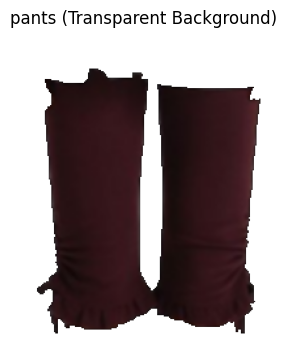

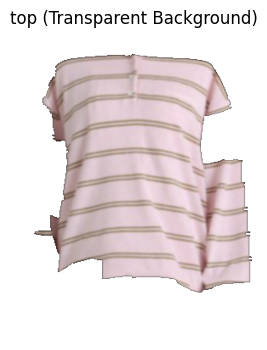

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def remove_background(cropped_images):
    final_images = []  # ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

    for tag, prob, img in cropped_images:
        h, w, _ = img.shape
        
        # Ï¥àÍ∏∞ ÎßàÏä§ÌÅ¨ ÏÑ§Ï†ï
        mask = np.zeros((h, w), np.uint8)
        bgd_model = np.zeros((1, 65), np.float64)
        fgd_model = np.zeros((1, 65), np.float64)
        
        # GrabCutÏùÑ ÏúÑÌïú Ï¥àÍ∏∞ ÏÇ¨Í∞ÅÌòï (Ï°∞Í∏à ÏûëÍ≤å ÏÑ§Ï†ï)
        rect = (5, 5, w-10, h-10)
        cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
        
        # Î∞∞Í≤ΩÍ≥º Ï†ÑÍ≤Ω Î∂ÑÎ¶¨
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
        result = img * mask2[:, :, np.newaxis]
        
        # Í≤ΩÍ≥Ñ Î∂ÄÎìúÎüΩÍ≤å (Í∞ÄÏö∞ÏãúÏïà Î∏îÎü¨ Ï†ÅÏö©)
        blurred = cv2.GaussianBlur(result, (5, 5), 0)

        # ÏïåÌåå Ï±ÑÎÑê Ï∂îÍ∞Ä
        alpha = mask2 * 255
        rgba = np.dstack([blurred, alpha])

        # üìå ÏµúÏ¢Ö Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        plt.figure(figsize=(4, 4))
        plt.imshow(rgba)
        plt.title(f"{tag} (Transparent Background)", fontsize=12)
        plt.axis("off")
        plt.show()

        final_images.append((tag, rgba))  # Í≤∞Í≥º Ï†ÄÏû•
    
    return final_images  # ÏµúÏ¢Ö Ïù¥ÎØ∏ÏßÄ Î∞òÌôò

# üî• Ïã§Ìñâ
final_results = remove_background(cropped_objects)




## Mean Shift

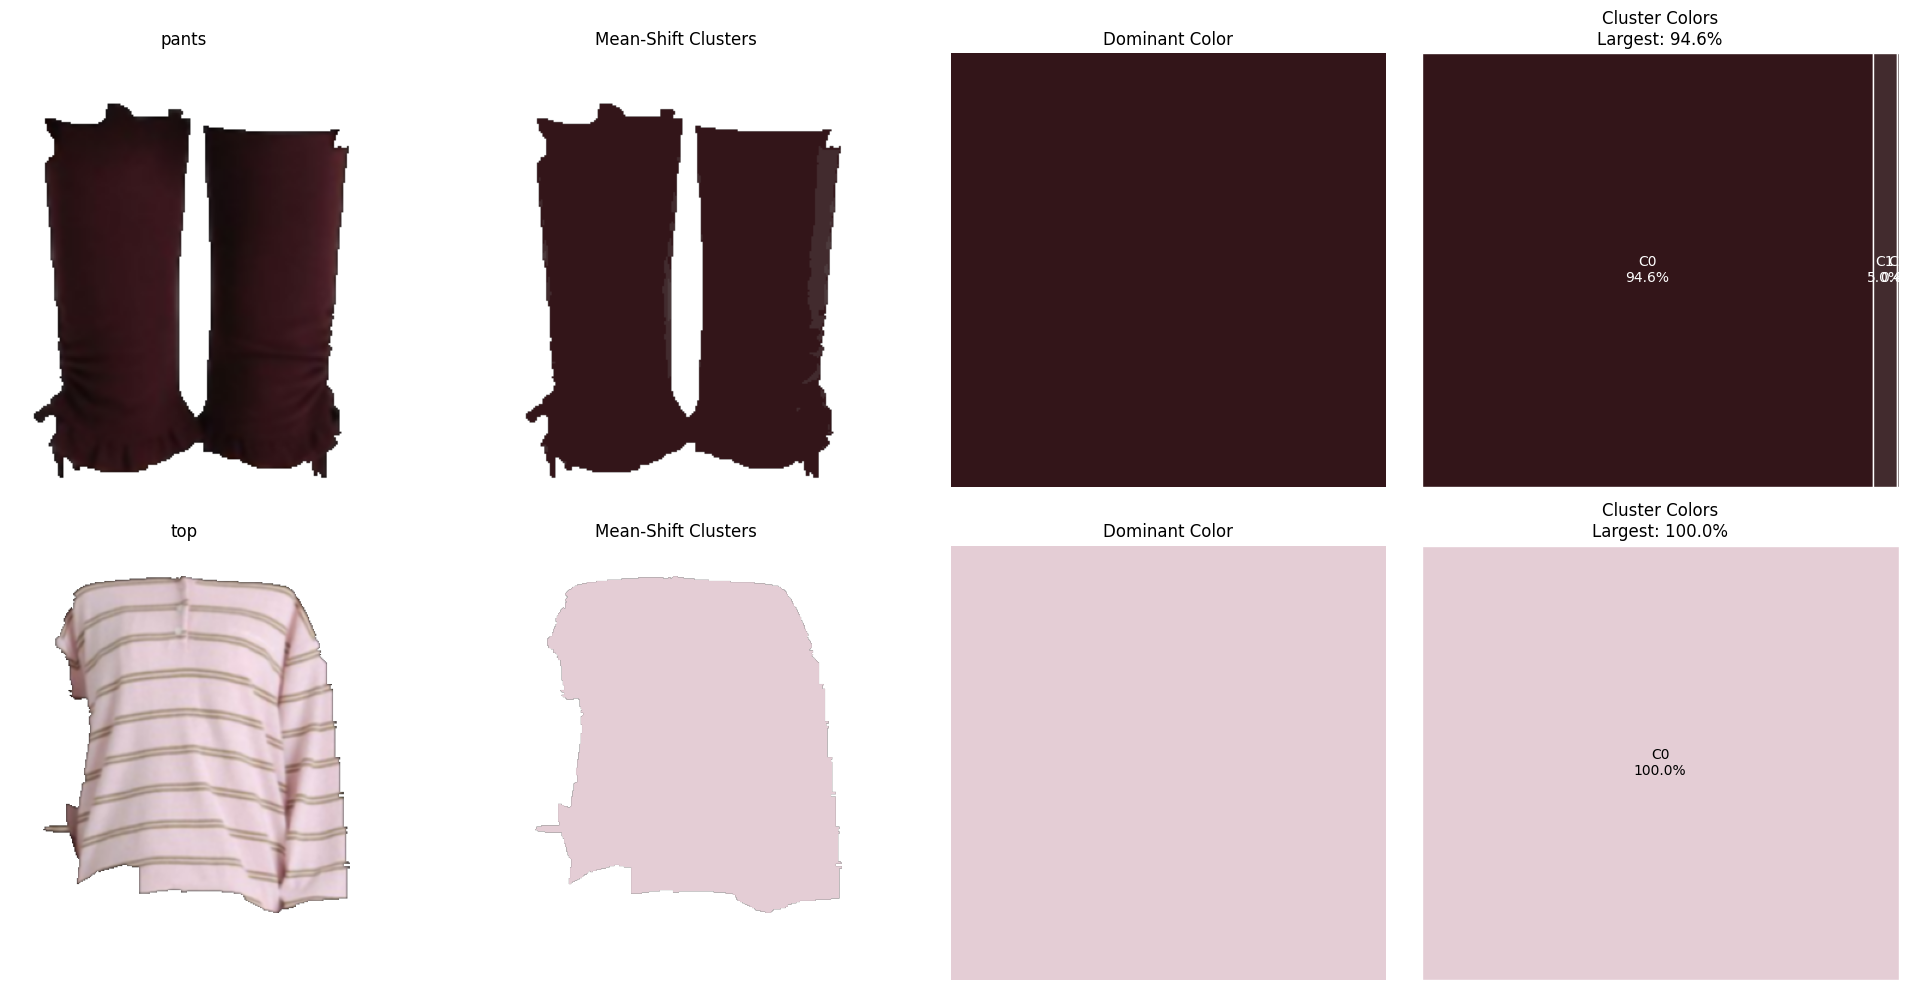

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import MeanShift, estimate_bandwidth

def plot_cluster_color_bar(ax, sorted_clusters, total_pixels):
    """
    ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÌèâÍ∑† ÏÉâÏÉÅÍ≥º ÌîΩÏÖÄ ÎπÑÏú®ÏùÑ Î∞îÌÉïÏúºÎ°ú ÏÉâÏÉÅ Î∞îÎ•º ÏÉùÏÑ±.
    """
    left = 0.0
    for label, (mean_color, count) in sorted_clusters:
        proportion = count / total_pixels
        color = np.array(mean_color[:3]) / 255.0
        
        rect = plt.Rectangle((left, 0), proportion, 1, 
                           facecolor=color, 
                           edgecolor='white')
        ax.add_patch(rect)
        
        text_color = 'black' if np.mean(color) > 0.5 else 'white'
        ax.text(left + proportion/2, 0.5, 
                f"C{label}\n{proportion*100:.1f}%",
                ha='center', va='center', 
                fontsize=10, 
                color=text_color)
        left += proportion
    
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)
    ax.axis('off')

def show_all_transparent_visualizations(final_results, quantile=0.2, n_samples=1000):
    """
    Î∞∞Í≤ΩÏù¥ Ï†úÍ±∞Îêú RGBA Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Mean-ShiftÎ°ú Î∂ÑÏÑùÌïòÏó¨ ÏãúÍ∞ÅÌôî
    """
    n = len(final_results)
    if n == 0:
        print("ÌëúÏãúÌï† Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§.")
        return
    
    fig, axes = plt.subplots(n, 4, figsize=(20, 5 * n))
    if n == 1:
        axes = np.expand_dims(axes, axis=0)
    
    for i, (tag, rgba_img) in enumerate(final_results):
        # ÏõêÎ≥∏ ÌÅ¨Í∏∞ Ï†ÄÏû•
        original_shape = rgba_img.shape[:2]
        
        # ÏõêÎ≥∏ Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
        axes[i, 0].imshow(rgba_img)
        axes[i, 0].set_title(f"{tag}")
        axes[i, 0].axis("off")
        
        # Ìà¨Î™ÖÌïòÏßÄ ÏïäÏùÄ ÌîΩÏÖÄÎßå ÏÑ†ÌÉù
        mask = rgba_img[:, :, 3] > 0
        pixels = rgba_img[mask][:, :3]  # RGB Í∞íÎßå ÏÇ¨Ïö©
        pixel_positions = np.argwhere(mask)  # ÌîΩÏÖÄ ÏúÑÏπò Ï†ÄÏû•
        
        if len(pixels) == 0:
            print(f"Ïù¥ÎØ∏ÏßÄ {tag}Ïóê ÌëúÏãúÌï† ÌîΩÏÖÄÏù¥ ÏóÜÏäµÎãàÎã§.")
            continue
            
        # Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
        bandwidth = estimate_bandwidth(pixels, 
                                    quantile=quantile, 
                                    n_samples=n_samples)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
        labels = ms.fit_predict(pixels)
        cluster_centers = ms.cluster_centers_.astype(int)
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º Ïù¥ÎØ∏ÏßÄ ÏÉùÏÑ±
        cluster_image = np.zeros_like(rgba_img)
        
        # Í∞Å ÌîΩÏÖÄÏùÑ ÏõêÎûò ÏúÑÏπòÏóê ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏÉâÏÉÅÏúºÎ°ú Ï±ÑÏö∞Í∏∞
        for pos, label in zip(pixel_positions, labels):
            cluster_image[pos[0], pos[1]] = np.append(cluster_centers[label], 255)
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º ÌëúÏãú (ÌîΩÏÖÄÌôîÎêú ÌòïÌÉúÎ°ú)
        axes[i, 1].imshow(cluster_image)
        axes[i, 1].set_title("Mean-Shift Clusters")
        axes[i, 1].axis("off")
        
        # Ï£ºÏöî ÏÉâÏÉÅ ÌëúÏãú
        counts = np.bincount(labels)
        dominant_label = np.argmax(counts)
        dominant_color = np.append(cluster_centers[dominant_label], 255)
        dominant_patch = np.full((50, 50, 4), dominant_color, dtype=np.uint8)
        axes[i, 2].imshow(dominant_patch)
        axes[i, 2].set_title("Dominant Color")
        axes[i, 2].axis("off")
        
        # ÏÉâÏÉÅ Î∞î ÌëúÏãú
        total_pixels = len(pixels)
        cluster_info = {label: (np.append(cluster_centers[label], 255), count) 
                       for label, count in zip(range(len(cluster_centers)), counts)}
        sorted_clusters = sorted(cluster_info.items(), 
                               key=lambda x: x[1][1], 
                               reverse=True)
        plot_cluster_color_bar(axes[i, 3], sorted_clusters, total_pixels)
        
        largest_percentage = (sorted_clusters[0][1][1] / total_pixels) * 100
        axes[i, 3].set_title(f"Cluster Colors\nLargest: {largest_percentage:.1f}%")
    
    plt.tight_layout()
    plt.show()

# Ïã§Ìñâ
show_all_transparent_visualizations(final_results, quantile=0.2, n_samples=1000)

In [5]:
import cv2
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

def process_transparent_images(final_results, quantile=0.2, n_samples=1000):
    """
    Î∞∞Í≤ΩÏù¥ Ï†úÍ±∞Îêú RGBA Ïù¥ÎØ∏ÏßÄÎì§ÏùÑ Mean-ShiftÎ°ú Î∂ÑÏÑù
    """
    n = len(final_results)
    if n == 0:
        print("Ï≤òÎ¶¨Ìï† Ïù¥ÎØ∏ÏßÄÍ∞Ä ÏóÜÏäµÎãàÎã§.")
        return

    for i, (tag, rgba_img) in enumerate(final_results):
        # ÏõêÎ≥∏ ÌÅ¨Í∏∞ Ï†ÄÏû•
        original_shape = rgba_img.shape[:2]

        # Ìà¨Î™ÖÌïòÏßÄ ÏïäÏùÄ ÌîΩÏÖÄÎßå ÏÑ†ÌÉù
        mask = rgba_img[:, :, 3] > 0
        pixels = rgba_img[mask][:, :3]  # RGB Í∞íÎßå ÏÇ¨Ïö©
        pixel_positions = np.argwhere(mask)  # ÌîΩÏÖÄ ÏúÑÏπò Ï†ÄÏû•

        if len(pixels) == 0:
            print(f"Ïù¥ÎØ∏ÏßÄ {tag}Ïóê Ï≤òÎ¶¨Ìï† ÌîΩÏÖÄÏù¥ ÏóÜÏäµÎãàÎã§.")
            continue

        # Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
        bandwidth = estimate_bandwidth(pixels, quantile=quantile, n_samples=n_samples)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
        labels = ms.fit_predict(pixels)
        cluster_centers = ms.cluster_centers_.astype(int)

        # Ï£ºÏöî ÏÉâÏÉÅ Î∂ÑÏÑù
        counts = np.bincount(labels)
        dominant_label = np.argmax(counts)
        dominant_color = np.append(cluster_centers[dominant_label], 255)

        print(f"Ïù¥ÎØ∏ÏßÄ {tag} Ï≤òÎ¶¨ ÏôÑÎ£å. Ï£ºÏöî ÏÉâÏÉÅ: {dominant_color[:3]}")

# Ïã§Ìñâ
process_transparent_images(final_results, quantile=0.2, n_samples=1000)


Ïù¥ÎØ∏ÏßÄ pants Ï≤òÎ¶¨ ÏôÑÎ£å. Ï£ºÏöî ÏÉâÏÉÅ: [51 21 25]
Ïù¥ÎØ∏ÏßÄ top Ï≤òÎ¶¨ ÏôÑÎ£å. Ï£ºÏöî ÏÉâÏÉÅ: [227 205 212]


## Hex codeÎ°ú ÏÉâ

cluster ÏÉâ Ï†ÑÏ≤¥ Ï∂úÎ†•

In [6]:
def get_color_clusters(final_results, quantile=0.2, n_samples=1000):
    """
    Í∞Å Ïù¥ÎØ∏ÏßÄÏùò Î™®Îì† ÏÉâÏÉÅ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÎπÑÏú®Í≥º Ìï®Íªò Ï∂îÏ∂úÌïòÏó¨ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    final_results : list of tuples
        (tag, rgba_img) ÌòïÌÉúÏùò ÌäúÌîåÏùÑ Îã¥ÏùÄ Î¶¨Ïä§Ìä∏
    quantile : float
        Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† quantile Í∞í
    n_samples : int
        bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† ÏÉòÌîå Ïàò
    
    Returns:
    --------
    dict
        Ïù¥ÎØ∏ÏßÄ ÌÉúÍ∑∏Î•º ÌÇ§Î°ú ÌïòÍ≥†, [(hex_code, percentage), ...] ÌòïÌÉúÏùò Î¶¨Ïä§Ìä∏Î•º Í∞íÏúºÎ°ú ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨
        Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Îäî ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Îê®
    """
    color_clusters = {}
    
    for tag, rgba_img in final_results:
        # Ìà¨Î™ÖÌïòÏßÄ ÏïäÏùÄ ÌîΩÏÖÄÎßå ÏÑ†ÌÉù
        mask = rgba_img[:, :, 3] > 0
        pixels = rgba_img[mask][:, :3]  # RGB Í∞íÎßå ÏÇ¨Ïö©
        
        if len(pixels) == 0:
            print(f"Ïù¥ÎØ∏ÏßÄ {tag}Ïóê ÌëúÏãúÌï† ÌîΩÏÖÄÏù¥ ÏóÜÏäµÎãàÎã§.")
            color_clusters[tag] = []
            continue
            
        # Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
        bandwidth = estimate_bandwidth(pixels,
                                    quantile=quantile,
                                    n_samples=n_samples)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
        labels = ms.fit_predict(pixels)
        cluster_centers = ms.cluster_centers_.astype(int)
        
        # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
        counts = np.bincount(labels)
        total_pixels = len(pixels)
        
        # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÏÉâÏÉÅÍ≥º ÎπÑÏú® Ï†ÄÏû•
        clusters = []
        for label in range(len(cluster_centers)):
            color = cluster_centers[label]
            percentage = (counts[label] / total_pixels) * 100
            
            hex_code = '#{:02x}{:02x}{:02x}'.format(
                color[0],
                color[1],
                color[2]
            )
            
            clusters.append((hex_code, percentage))
        
        # ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
        clusters.sort(key=lambda x: x[1], reverse=True)
        color_clusters[tag] = clusters
    
    return color_clusters

def print_color_clusters(final_results, quantile=0.2, n_samples=1000):
    """
    Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏÉÅ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÎπÑÏú®Í≥º Ìï®Íªò Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò
    """
    results = get_color_clusters(final_results, quantile, n_samples)
    
    print("Color Clusters (Hex Codes and Percentages):")
    print("-" * 50)
    for tag, clusters in results.items():
        print(f"\n{tag}:")
        if clusters:
            for i, (hex_code, percentage) in enumerate(clusters, 1):
                print(f"  Cluster {i}: {hex_code} ({percentage:.1f}%)")
        else:
            print("  No valid pixels found")

In [7]:
print_color_clusters(final_results)

Color Clusters (Hex Codes and Percentages):
--------------------------------------------------

pants:
  Cluster 1: #331519 (94.8%)
  Cluster 2: #482a2d (4.0%)
  Cluster 3: #422e30 (1.0%)
  Cluster 4: #4d3c3e (0.2%)

top:
  Cluster 1: #e3cdd4 (100.0%)


ÎåÄÌëúÏÉâ ÌïòÎÇòÎßå Ï∂úÎ†•

In [8]:
def get_most_dominant_color(final_results, quantile=0.2, n_samples=1000):
    """
    Í∞Å Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞ÄÏû• ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏÉâÏÉÅÏùò hex codeÎßå Î∞òÌôòÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    final_results : list of tuples
        (tag, rgba_img) ÌòïÌÉúÏùò ÌäúÌîåÏùÑ Îã¥ÏùÄ Î¶¨Ïä§Ìä∏
    quantile : float
        Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† quantile Í∞í
    n_samples : int
        bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† ÏÉòÌîå Ïàò
    
    Returns:
    --------
    dict
        Ïù¥ÎØ∏ÏßÄ ÌÉúÍ∑∏Î•º ÌÇ§Î°ú ÌïòÍ≥†, (hex_code, percentage) ÌäúÌîåÏùÑ Í∞íÏúºÎ°ú ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨
    """
    dominant_colors = {}
    
    for tag, rgba_img in final_results:
        mask = rgba_img[:, :, 3] > 0
        pixels = rgba_img[mask][:, :3]
        
        if len(pixels) == 0:
            dominant_colors[tag] = None
            continue
            
        bandwidth = estimate_bandwidth(pixels, quantile=quantile, n_samples=n_samples)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        
        labels = ms.fit_predict(pixels)
        cluster_centers = ms.cluster_centers_.astype(int)
        
        counts = np.bincount(labels)
        dominant_label = np.argmax(counts)
        dominant_color = cluster_centers[dominant_label]
        percentage = (counts[dominant_label] / len(pixels)) * 100
        
        hex_code = '#{:02x}{:02x}{:02x}'.format(
            dominant_color[0],
            dominant_color[1],
            dominant_color[2]
        )
        
        dominant_colors[tag] = (hex_code, percentage)
    
    return dominant_colors

# Ïã§Ìñâ Î∞©Î≤ï
results = get_most_dominant_color(final_results)
for tag, color_info in results.items():
    if color_info:
        hex_code, percentage = color_info
        print(f"{tag}: {hex_code} ({percentage:.1f}%)")
    else:
        print(f"{tag}: No valid pixels found")

pants: #331519 (94.8%)
top: #e3cdd4 (100.0%)


In [24]:
print(results)

{'pants': ('#331519', np.float64(94.55199848456147)), 'top': ('#e4cdd5', np.float64(100.0))}


# ÏΩîÎìú Ìï©ÏπòÍ∏∞

In [ ]:
import requests
import json
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict
from sklearn.cluster import MeanShift, estimate_bandwidth

"""

Azure KeyÍ∞Ä Îì§Ïñ¥Í∞à ÏûêÎ¶¨ÏûÖÎãàÎã§

"""

## Custom Vision Í≤∞Í≥º ÌôïÏù∏
# ÏûÑÍ≥ÑÍ∞í ÏÑ§Ï†ï
THRESHOLD = 0.8  # 80% Ïù¥ÏÉÅ ÌôïÎ•†Îßå ÌëúÏãú

#Ïù¥ÎØ∏ÏßÄ Í≤ΩÎ°ú
image_file = f"data/musinsa_images_pants_ver2/pants_313.jpg"

# Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ Ï†ÄÏû•Ïö© ÎîïÏÖîÎÑàÎ¶¨
category_colors = defaultdict(lambda: (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255)))

def detect_objects(image_path):
    # Ïù¥ÎØ∏ÏßÄ Î°úÎìú
    with open(image_path, "rb") as image_file:
        image_data = image_file.read()

    # API ÏöîÏ≤≠ Ìó§Îçî Î∞è Îç∞Ïù¥ÌÑ∞
    headers = {
        "Prediction-Key": prediction_key,
        "Content-Type": "application/octet-stream"
    }
    url = f"{prediction_endpoint}/customvision/v3.0/Prediction/{project_id}/detect/iterations/{model_name}/image"
    
    # ÏöîÏ≤≠ Ï†ÑÏÜ°
    response = requests.post(url, headers=headers, data=image_data)
    
    if response.status_code != 200:
        print("Error:", response.text)
        return None

    # JSON ÏùëÎãµ Îç∞Ïù¥ÌÑ∞ ÌååÏã±
    return response.json()

def visualize_detections(image_path, detections):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for prediction in detections["predictions"]:
        probability = prediction["probability"]
        if probability < THRESHOLD:
            continue  # ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÎÇÆÏúºÎ©¥ Î¨¥Ïãú

        tag_name = prediction["tagName"]
        bbox = prediction["boundingBox"]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Ï†ïÎ≥¥ Î≥ÄÌôò
        h, w, _ = image.shape
        x1, y1 = int(bbox["left"] * w), int(bbox["top"] * h)
        x2, y2 = int((bbox["left"] + bbox["width"]) * w), int((bbox["top"] + bbox["height"]) * h)

        # Ïπ¥ÌÖåÍ≥†Î¶¨Î≥Ñ ÏÉâÏÉÅ ÏÑ†ÌÉù
        color = category_colors[tag_name]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Î∞è ÌÖçÏä§Ìä∏ Ï∂îÍ∞Ä
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, f"{tag_name} ({probability:.2f})", (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

    # # Í≤∞Í≥º ÏãúÍ∞ÅÌôî
    # plt.figure(figsize=(10, 8))
    # plt.imshow(image)
    # plt.axis("off")
    # plt.show()

# Ïã§Ìñâ ÏòàÏãú

detections = detect_objects(image_file)
if detections:
    visualize_detections(image_file, detections)


## ÌïÑÏöîÌïú Î∂ÄÎ∂ÑÎßå Í∞ÄÏ†∏Ïò§Í∏∞
def show_cropped_objects_clean(image_path, detections, threshold=THRESHOLD):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    cropped_images = []  # ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄÎ•º Ï†ÄÏû•Ìï† Î¶¨Ïä§Ìä∏

    for prediction in detections["predictions"]:
        probability = prediction["probability"]
        if probability < threshold:
            continue  # ÏûÑÍ≥ÑÍ∞íÎ≥¥Îã§ ÎÇÆÏúºÎ©¥ Î¨¥Ïãú

        tag_name = prediction["tagName"]
        bbox = prediction["boundingBox"]

        # Î∞îÏö¥Îî© Î∞ïÏä§ Ï¢åÌëú Î≥ÄÌôò
        h, w, _ = image.shape
        x1, y1 = int(bbox["left"] * w), int(bbox["top"] * h)
        x2, y2 = int((bbox["left"] + bbox["width"]) * w), int((bbox["top"] + bbox["height"]) * h)

        # Í∞ùÏ≤¥ Î∂ÄÎ∂Ñ ÏûòÎùºÎÇ¥Í∏∞
        cropped_object = image[y1:y2, x1:x2]
        cropped_images.append((tag_name, probability, cropped_object))  # (ÎùºÎ≤®, ÌôïÎ•†, Ïù¥ÎØ∏ÏßÄ) Ï†ÄÏû•

        # # ÏÉà Ï∞ΩÏóê Í∞úÎ≥Ñ Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        # plt.figure(figsize=(3, 3))
        # plt.imshow(cropped_object)
        # plt.title(f"{tag_name} ({probability:.2f})")
        # plt.axis("off")
        # plt.show()

    return cropped_images  # ÌÅ¨Î°≠Îêú Ïù¥ÎØ∏ÏßÄ Î¶¨Ïä§Ìä∏ Î∞òÌôò

# Ïã§Ìñâ ÏòàÏãú
cropped_objects = show_cropped_objects_clean(image_file, detections)

# Î∞òÌôòÎêú Ïù¥ÎØ∏ÏßÄ ÌôïÏù∏
for tag, prob, img in cropped_objects:
    print(f"Tag: {tag}, Probability: {prob:.2f}, Image Shape: {img.shape}")





def remove_background(cropped_images):
    final_images = []  # ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

    for tag, prob, img in cropped_images:
        h, w, _ = img.shape
        
        # Ï¥àÍ∏∞ ÎßàÏä§ÌÅ¨ ÏÑ§Ï†ï
        mask = np.zeros((h, w), np.uint8)
        bgd_model = np.zeros((1, 65), np.float64)
        fgd_model = np.zeros((1, 65), np.float64)
        
        # GrabCutÏùÑ ÏúÑÌïú Ï¥àÍ∏∞ ÏÇ¨Í∞ÅÌòï (Ï°∞Í∏à ÏûëÍ≤å ÏÑ§Ï†ï)
        rect = (5, 5, w-10, h-10)
        cv2.grabCut(img, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
        
        # Î∞∞Í≤ΩÍ≥º Ï†ÑÍ≤Ω Î∂ÑÎ¶¨
        mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype("uint8")
        result = img * mask2[:, :, np.newaxis]
        
        # Í≤ΩÍ≥Ñ Î∂ÄÎìúÎüΩÍ≤å (Í∞ÄÏö∞ÏãúÏïà Î∏îÎü¨ Ï†ÅÏö©)
        blurred = cv2.GaussianBlur(result, (5, 5), 0)

        # ÏïåÌåå Ï±ÑÎÑê Ï∂îÍ∞Ä
        alpha = mask2 * 255
        rgba = np.dstack([blurred, alpha])

        # # üìå ÏµúÏ¢Ö Ïù¥ÎØ∏ÏßÄ Ï∂úÎ†•
        # plt.figure(figsize=(4, 4))
        # plt.imshow(rgba)
        # plt.title(f"{tag} (Transparent Background)", fontsize=12)
        # plt.axis("off")
        # plt.show()

        final_images.append((tag, rgba))  # Í≤∞Í≥º Ï†ÄÏû•
    
    return final_images  # ÏµúÏ¢Ö Ïù¥ÎØ∏ÏßÄ Î∞òÌôò

# üî• Ïã§Ìñâ
final_results = remove_background(cropped_objects)



def get_color_clusters(final_results, quantile=0.2, n_samples=1000):
    """
    Í∞Å Ïù¥ÎØ∏ÏßÄÏùò Î™®Îì† ÏÉâÏÉÅ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÎπÑÏú®Í≥º Ìï®Íªò Ï∂îÏ∂úÌïòÏó¨ Î∞òÌôòÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    final_results : list of tuples
        (tag, rgba_img) ÌòïÌÉúÏùò ÌäúÌîåÏùÑ Îã¥ÏùÄ Î¶¨Ïä§Ìä∏
    quantile : float
        Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† quantile Í∞í
    n_samples : int
        bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† ÏÉòÌîå Ïàò
    
    Returns:
    --------
    dict
        Ïù¥ÎØ∏ÏßÄ ÌÉúÍ∑∏Î•º ÌÇ§Î°ú ÌïòÍ≥†, [(hex_code, percentage), ...] ÌòïÌÉúÏùò Î¶¨Ïä§Ìä∏Î•º Í∞íÏúºÎ°ú ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨
        Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Îäî ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨Îê®
    """
    color_clusters = {}
    
    for tag, rgba_img in final_results:
        # Ìà¨Î™ÖÌïòÏßÄ ÏïäÏùÄ ÌîΩÏÖÄÎßå ÏÑ†ÌÉù
        mask = rgba_img[:, :, 3] > 0
        pixels = rgba_img[mask][:, :3]  # RGB Í∞íÎßå ÏÇ¨Ïö©
        
        if len(pixels) == 0:
            print(f"Ïù¥ÎØ∏ÏßÄ {tag}Ïóê ÌëúÏãúÌï† ÌîΩÏÖÄÏù¥ ÏóÜÏäµÎãàÎã§.")
            color_clusters[tag] = []
            continue
            
        # Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ
        bandwidth = estimate_bandwidth(pixels,
                                    quantile=quantile,
                                    n_samples=n_samples)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        
        # ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏàòÌñâ
        labels = ms.fit_predict(pixels)
        cluster_centers = ms.cluster_centers_.astype(int)
        
        # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÎπÑÏú® Í≥ÑÏÇ∞
        counts = np.bincount(labels)
        total_pixels = len(pixels)
        
        # Í∞Å ÌÅ¥Îü¨Ïä§ÌÑ∞Ïùò ÏÉâÏÉÅÍ≥º ÎπÑÏú® Ï†ÄÏû•
        clusters = []
        for label in range(len(cluster_centers)):
            color = cluster_centers[label]
            percentage = (counts[label] / total_pixels) * 100
            
            hex_code = '#{:02x}{:02x}{:02x}'.format(
                color[0],
                color[1],
                color[2]
            )
            
            clusters.append((hex_code, percentage))
        
        # ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏàúÏúºÎ°ú Ï†ïÎ†¨
        clusters.sort(key=lambda x: x[1], reverse=True)
        color_clusters[tag] = clusters
    
    return color_clusters

def print_color_clusters(final_results, quantile=0.2, n_samples=1000):
    """
    Í∞Å Ïù¥ÎØ∏ÏßÄÏùò ÏÉâÏÉÅ ÌÅ¥Îü¨Ïä§ÌÑ∞Î•º ÎπÑÏú®Í≥º Ìï®Íªò Ï∂úÎ†•ÌïòÎäî Ìï®Ïàò
    """
    results = get_color_clusters(final_results, quantile, n_samples)
    
    print("Color Clusters (Hex Codes and Percentages):")
    print("-" * 50)
    for tag, clusters in results.items():
        print(f"\n{tag}:")
        if clusters:
            for i, (hex_code, percentage) in enumerate(clusters, 1):
                print(f"  Cluster {i}: {hex_code} ({percentage:.1f}%)")
        else:
            print("  No valid pixels found")

print_color_clusters(final_results)

def get_most_dominant_color(final_results, quantile=0.2, n_samples=1000):
    """
    Í∞Å Ïù¥ÎØ∏ÏßÄÏóêÏÑú Í∞ÄÏû• ÎπÑÏú®Ïù¥ ÎÜíÏùÄ ÏÉâÏÉÅÏùò hex codeÎßå Î∞òÌôòÌïòÎäî Ìï®Ïàò
    
    Parameters:
    -----------
    final_results : list of tuples
        (tag, rgba_img) ÌòïÌÉúÏùò ÌäúÌîåÏùÑ Îã¥ÏùÄ Î¶¨Ïä§Ìä∏
    quantile : float
        Mean-Shift ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏùò bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† quantile Í∞í
    n_samples : int
        bandwidth Ï∂îÏ†ïÏóê ÏÇ¨Ïö©Ìï† ÏÉòÌîå Ïàò
    
    Returns:
    --------
    dict
        Ïù¥ÎØ∏ÏßÄ ÌÉúÍ∑∏Î•º ÌÇ§Î°ú ÌïòÍ≥†, (hex_code, percentage) ÌäúÌîåÏùÑ Í∞íÏúºÎ°ú ÌïòÎäî ÎîïÏÖîÎÑàÎ¶¨
    """
    dominant_colors = {}
    
    for tag, rgba_img in final_results:
        mask = rgba_img[:, :, 3] > 0
        pixels = rgba_img[mask][:, :3]
        
        if len(pixels) == 0:
            dominant_colors[tag] = None
            continue
            
        bandwidth = estimate_bandwidth(pixels, quantile=quantile, n_samples=n_samples)
        ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
        
        labels = ms.fit_predict(pixels)
        cluster_centers = ms.cluster_centers_.astype(int)
        
        counts = np.bincount(labels)
        dominant_label = np.argmax(counts)
        dominant_color = cluster_centers[dominant_label]
        percentage = (counts[dominant_label] / len(pixels)) * 100
        
        hex_code = '#{:02x}{:02x}{:02x}'.format(
            dominant_color[0],
            dominant_color[1],
            dominant_color[2]
        )
        
        dominant_colors[tag] = (hex_code, percentage)
    
    return dominant_colors

# Ïã§Ìñâ Î∞©Î≤ï
results = get_most_dominant_color(final_results)
for tag, color_info in results.items():
    if color_info:
        hex_code, percentage = color_info
        print(f"{tag}: {hex_code} ({percentage:.1f}%)")
    else:
        print(f"{tag}: No valid pixels found")


